In [158]:
import time
import os
import subprocess
from urllib.parse import urlencode

from fastai.vision import *
from selenium import webdriver

In [145]:
classes = [
    'bacon',
    'margherita',
    'egg',
    'mushroom',
    'pepperoni',
    'sausage',
    'pineapple',
    'olive'
]

# Get image URLs
Generate urls on google images for each class

In [140]:
image_url_queries = {}
root_url = 'https://www.google.com/search?tbm=isch&'

for c in classes:
    query = '"%s pizza"' % c
    for d in classes:
        if c != d:
            query += ' -%s' % d
        
    url = root_url + urlencode({'q': query})
    image_url_queries[c] = url
    print(url)
    

https://www.google.com/search?tbm=isch&q=%22bacon+pizza%22+-margherita+-egg+-mushroom+-pepperoni+-sausage+-pineapple+-olive
https://www.google.com/search?tbm=isch&q=%22margherita+pizza%22+-bacon+-egg+-mushroom+-pepperoni+-sausage+-pineapple+-olive
https://www.google.com/search?tbm=isch&q=%22egg+pizza%22+-bacon+-margherita+-mushroom+-pepperoni+-sausage+-pineapple+-olive
https://www.google.com/search?tbm=isch&q=%22mushroom+pizza%22+-bacon+-margherita+-egg+-pepperoni+-sausage+-pineapple+-olive
https://www.google.com/search?tbm=isch&q=%22pepperoni+pizza%22+-bacon+-margherita+-egg+-mushroom+-sausage+-pineapple+-olive
https://www.google.com/search?tbm=isch&q=%22sausage+pizza%22+-bacon+-margherita+-egg+-mushroom+-pepperoni+-pineapple+-olive
https://www.google.com/search?tbm=isch&q=%22pineapple+pizza%22+-bacon+-margherita+-egg+-mushroom+-pepperoni+-sausage+-olive
https://www.google.com/search?tbm=isch&q=%22olive+pizza%22+-bacon+-margherita+-egg+-mushroom+-pepperoni+-sausage+-pineapple


A pair of javascript commands that will download the image urls from a google page:

In [141]:
get_image_urls = "urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));" + \
                 "\n" + "window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\\n')));"

A few configurations for `chromedriver`:

In [134]:
# For WSL, make sure this is the windows .exe file
chromedriver_location = r'C:\Users\C23Cooper.Hammond\Documents\dev\bin\chromedriver.exe'
# Make sure this folder is empty
downloads_folder = r'C:\Users\C23Cooper.Hammond\Documents\dev\Learning\fast.ai\pizza-pundit\urls'

options = webdriver.ChromeOptions()
options.add_experimental_option('prefs', {'download.default_directory' : downloads_folder})

Actually download the urls using `selenium` and `chromedriver`

In [135]:
# this command spawns a windows chromedriver instance b/c I'm on a WSL system
os.system('cmd.exe /c "%s" &' % chromedriver_location)

driver = webdriver.Chrome(port=9515, options=options)

for c, url in image_url_queries.items():
    driver.get(url)
    driver.execute_script(get_image_urls)

time.sleep(2)
driver.quit()

Rename the files to their proper classes

In [136]:
wsl_downloads_folder = subprocess.check_output('wslpath "%s"' % downloads_folder, shell=True).decode('utf-8').strip("\n")

In [137]:
for index, c in enumerate(classes):
    filename = 'download'
    if index > 0:
        filename += ' (%s)' % index
        
    os.rename(wsl_downloads_folder + '/%s' % filename, 
              wsl_downloads_folder + '/%s.csv' % classes[index])
        
    index += 1

# Download images

In [164]:
root_data_dest = Path("data/")

In [162]:
for c in classes:
    print(c)
    class_data_dest = root_data_dest/c
    (root_data_dest/c).mkdir(parents=True, exist_ok=True)
    download_images(wsl_downloads_folder + ('/%s.csv' % c), class_data_dest)

bacon


margherita


egg


mushroom


pepperoni


sausage


pineapple


olive


In [163]:
for c in classes:
    print(c)
    verify_images(root_data_dest/c, delete=True, max_size=1000)

bacon


margherita


egg


mushroom


pepperoni


sausage


pineapple


olive


# View Data

In [165]:
np.random.seed(42)
data = ImageDataBunch.from_folder(root_data_dest, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [166]:
data.classes

['bacon',
 'egg',
 'margherita',
 'mushroom',
 'olive',
 'pepperoni',
 'pineapple',
 'sausage']

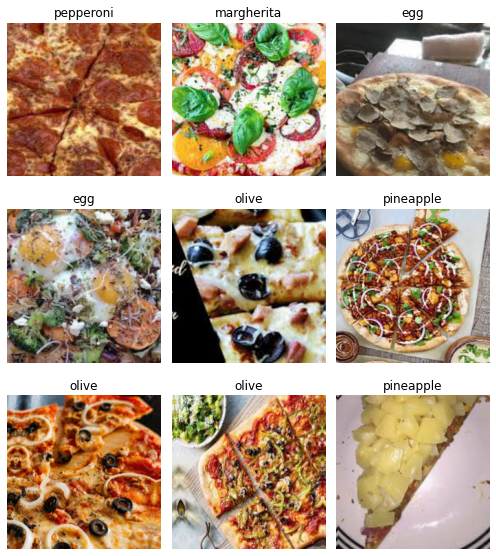

In [168]:
data.show_batch(rows=3, figsize=(7,8))